In [1]:
#!pip install xgboost

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

In [3]:
ins = pd.read_csv('insurance.csv')

In [4]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
ins.isnull().sum()
ins.info()
ins.drop_duplicates(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins.duplicated().sum()

0

<Figure size 6000x3000 with 0 Axes>

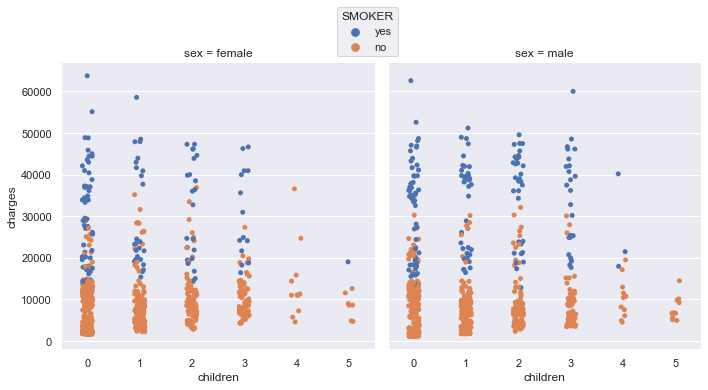

In [7]:
plt.figure(figsize = (20,10), dpi = 300)
sns.set()
sns.catplot(data = ins, x = 'children',y = 'charges', hue = 'smoker', col = 'sex', legend = False)
plt.tight_layout()
plt.legend(title = 'SMOKER', bbox_to_anchor = [0.05,1.215])

In [8]:
ins.corr()['charges'].sort_values()

children    0.067389
bmi         0.198401
age         0.298308
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='age', ylabel='charges'>

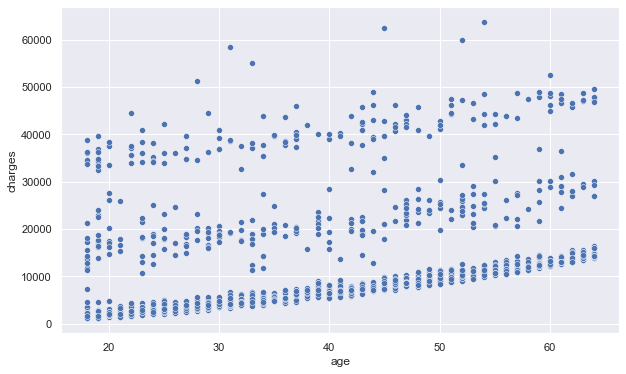

In [9]:
plt.figure(figsize = (10,6))
sns.set()
sns.scatterplot(data = ins, x = 'age',y = 'charges')

In [10]:
ins_objs = ins.select_dtypes(include = object)
ins_nums = ins.select_dtypes(exclude = object)

In [11]:
ins_objs = pd.get_dummies(ins_objs, drop_first = True)

In [12]:
ins_final2 = pd.concat([ins_nums,ins_objs], axis = 1)

In [13]:
X = ins_final2.drop(['charges'], axis = 1)

In [14]:
y = ins_final2['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [25]:
scale = StandardScaler()
train_scale = scale.fit_transform(X_train)
test_scale = scale.transform(X_test)

In [26]:
model_elastic = ElasticNet()

In [60]:
par_grid = {'alpha': [0.1, 1, 10, 50,35, 100, 0.01], 'l1_ratio': [0, 0.95,0.99, 1, 0.5, 0.7, 4,10,11]}

In [61]:
grid_model = GridSearchCV(estimator = model_elastic, param_grid =par_grid, cv = 10)

In [62]:
grid_model.fit(train_scale, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 35, 100, 0.01],
                         'l1_ratio': [0, 0.95, 0.99, 1, 0.5, 0.7, 4, 10, 11]})

In [63]:
grid_model.best_params_

{'alpha': 50, 'l1_ratio': 1}

In [64]:
og_elastic = ElasticNet(alpha = 50, l1_ratio = 1)
og_elastic.fit(train_scale, y_train)

ElasticNet(alpha=50, l1_ratio=1)

In [65]:
predict_elastic = og_elastic.predict(test_scale)

In [66]:
score = r2_score(y_test, predict_elastic)

In [67]:
score

0.7037552713390335

In [68]:
MAE =  mean_absolute_error(y_test, predict_elastic)

In [69]:
RMSE = np.sqrt(mean_squared_error(y_test, predict_elastic))

In [70]:
MAE

4535.238362249296

In [72]:
RMSE

6805.244011022214

In [74]:
np.mean(ins_final2['charges'])

13279.121486655948

In [80]:
scores = {'Model': 'ElasticNet',
          'Acuracy Scores':score,
          'Absolute error': MAE,
          'Root Mean Squared error':RMSE}

In [84]:
acc = pd.DataFrame(scores,index = [0])

In [82]:
acc

,Model,Acuracy Scores,Absolute error,Root Mean Squared error
0,ElasticNet,0.703755,4535.238362,6805.244011


In [86]:
compare_elastic = pd.DataFrame({'Actual_values': y_test , 'Predicted_elasticNet':predict_elastic})

In [87]:
compare_elastic

,Actual_values,Predicted_elasticNet
44,6079.67150,10310.449095
134,2457.21115,2758.913546
981,4500.33925,3811.944726
619,10713.64400,13868.287164
1239,3238.43570,8198.035282
...,...,...
489,10461.97940,12136.143714
142,18972.49500,28851.762917
842,36021.01120,28576.289517
497,8027.96800,9205.373914
